In [1]:
# @title Imports
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


from popy.simulation_tools import *
from popy.io_tools import load_behavior
from popy.behavior_data_tools import *

from simulation_helpers import simulate_agent, estimate_ll
from plotting_helpers import *
from popy.config import COLORS, PROJECT_PATH_LOCAL



In [19]:
# show bic and LPT values
w = 4
h = 4

dfs = []
for monkey in ['ka', 'po']:
    # load behavior data
    floc = os.path.join(PROJECT_PATH_LOCAL, 'notebooks', 'behav_modeling', 'results', f'simulation_results_{monkey}.pkl')
    res_temp = pd.read_pickle(floc)

    # add monkey name to the dataframe
    res_temp['Monkey'] = monkey
    dfs.append(res_temp)

# put together all dataframes
res_all = pd.concat(dfs, ignore_index=True)


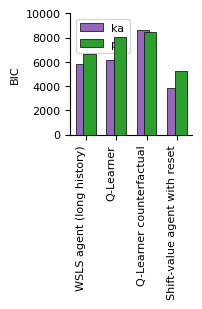

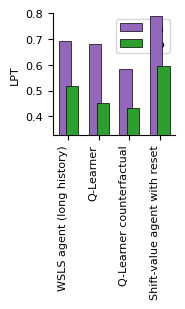

In [41]:
# set fontsize to 8
plt.rcParams.update({'font.size': 8})
# set figure size

for mode in ['BIC_CV', 'LPT_CV']:
    fig, ax = plt.subplots(1, 1, figsize=(w/2.54, h/2.54))

    # Define bar positions and styling
    models = res_all['Model'].unique()
    monkeys = res_all['Monkey'].unique()
    
    # Bar width and overlap amount
    width = 0.4
    overlap = 0.15  # Higher value = more overlap
    
    x = np.arange(len(models))
    
    # Plot bars for each monkey with slight overlap
    for i, m in enumerate(monkeys):
        # Calculate position offset with overlap
        offset = (i - len(monkeys)/2 + 0.5) * (width - overlap)
        
        # Get data for this monkey
        subset = res_all[res_all['Monkey'] == m]
        values = [subset[subset['Model'] == model][mode].values[0] 
                  if len(subset[subset['Model'] == model]) > 0 else np.nan 
                  for model in models]
        
        # Plot with custom color from COLORS dictionary
        ax.bar(x + offset, values, width=width, label=m, 
               color=COLORS[m], alpha=1, edgecolor='black', 
               linewidth=0.5, zorder=10)
    
    # Configure axes
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=90, horizontalalignment='right')
    ax.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.grid(axis='y', alpha=0.5, zorder=0)

    if mode == 'BIC_CV':
        ax.set_ylim(0, 10000)
        ax.set_ylabel('BIC', fontsize=8)
    elif mode == 'LPT_CV':
        ax.set_ylim(.33, .80)
        ax.set_yticks(np.arange(.4, .9, .1))
        ax.set_ylabel('LPT', fontsize=8)
        
        # save as svg
        floc = os.path.join('figs', f'lpt.svg')
        plt.savefig(floc, dpi=300, bbox_inches='tight', transparent=True)